# Yashwant Desai –  Python_Advanced_Assignment_25

# Q1. What is the distinction between a numpy array and a pandas data frame? Is there a way to convert between the two if there is?

Below is the distinction between a numpy array and a pandas data frame.

o NumPy Array all elements are of the same data type (homogeneous)

o Pandas DataFrame each column can have a different data type (heterogeneous)

o NumPy stands for "Numerical Python," and it provides support for large, multi-dimensional arrays and matrices of data.

o DataFrames can store data of different data types in each column, making them more flexible for working with heterogeneous data.

o NumPy array use for mathematical and scientific computations

o Pandas dataframe use for data analysis, data cleaning, data transformation, and data exploration

Converting between NumPy arrays and Pandas DataFrames is straightforward. You can convert a Pandas DataFrame to a NumPy array using the .values attribute of the DataFrame, and you can convert a NumPy array to a Pandas DataFrame using the pd.DataFrame() constructor.

In [1]:
import pandas as pd
print("Data Frame")
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)
print("_________________________________________")
numpy_array = df.values
print("numpy array")
print(numpy_array)

Data Frame
   A  B
0  1  4
1  2  5
2  3  6
_________________________________________
numpy array
[[1 4]
 [2 5]
 [3 6]]


# Q2. What can go wrong when an user enters in a stock-ticker symbol, and how do you handle it?

By addressing below potential issues, we can create a robust and user-friendly stock ticker symbol input system.When a user enters a stock ticker symbol several things can go wrong.

o Invalid Ticker Symbol:Check if the entered ticker symbol is valid using an API or database of valid symbols. Provide feedback to the user if the symbol is invalid.

o Case Sensitivity:Normalize the case of the entered symbol to ensure consistency in processing.

o Missing Ticker Symbol:Ensure the user has entered a valid symbol by checking for empty input and prompting for a valid symbol.

o Multiple Matches:Handle cases where a symbol represents multiple assets by providing a list of options and allowing the user to select the correct one.

o API Errors:Implement error handling for API requests, including handling network issues, rate limits, and service downtime.

o Data Not Found:Gracefully handle cases where data for the entered symbol is not available, informing the user and suggesting alternative actions.

In [2]:
import yfinance as yf  

def get_stock_data(ticker_symbol):
    try:
        ticker = yf.Ticker(ticker_symbol)
        data = ticker.history(period="1d")
        return data
    except ValueError:
        print(f"Invalid ticker symbol: {ticker_symbol}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
user_input = input("Enter a stock ticker symbol: ")

if user_input:
    symbol = user_input.upper()  
    stock_data = get_stock_data(symbol)
    if stock_data is not None:
        print(stock_data)
else:
    print("Please enter a valid stock ticker symbol.")

Enter a stock ticker symbol: AAPL
                                 Open        High         Low       Close  \
Date                                                                        
2023-10-27 00:00:00-04:00  166.910004  168.960007  166.830002  168.220001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-10-27 00:00:00-04:00  58468600        0.0           0.0  


# Q3. Identify some of the plotting techniques that are used to produce a stock-market chart.

To produce stock market charts we can use various plotting techniques and libraries, including:

Matplotlib: A versatile library for creating line charts, candlestick charts, OHLC charts, and more.

Pandas Plotting: Built-in plotting functionality in Pandas for basic chart types like line, bar, and area charts.

Plotly: An interactive library for dynamic and web-based stock market charts and dashboards.

Seaborn: A high-level interface for creating attractive statistical graphics, including line charts.

mplfinance (formerly mpl-finance): A dedicated library for financial data visualization, particularly OHLC and candlestick charts.

Bokeh: An interactive visualization library for creating web-based stock market charts and applications.

Holoviews: A library for interactive, dynamic charts and dashboards, compatible with Pandas DataFrames.

Altair: A declarative statistical visualization library that can be used for various chart types.

Quantlib-Python: For complex financial modeling, derivatives pricing, and specialized financial plots.

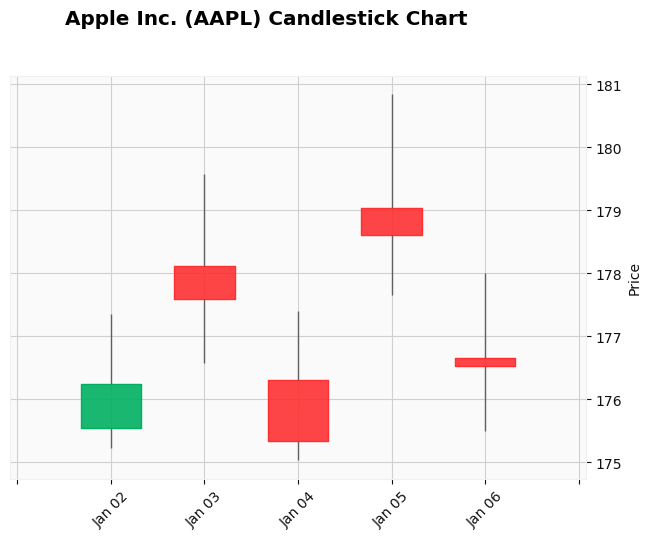

In [3]:
import pandas as pd
import mplfinance as mpf
data = {
    'Date': ['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06'],
    'Open': [175.54, 178.12, 176.30, 179.03, 176.66],
    'High': [177.35, 179.58, 177.40, 180.84, 178.00],
    'Low': [175.23, 176.58, 175.03, 177.66, 175.50],
    'Close': [176.24, 177.59, 175.33, 178.61, 176.52]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)  

mpf.plot(df, type='candle', title='Apple Inc. (AAPL) Candlestick Chart', ylabel='Price', style='yahoo')

# Q4. Why is it essential to print a legend on a stock market chart?

Including a legend on a stock market chart created is essential for the following reasons:

Interpretability: It helps users understand what each data series or element on the chart represents.

Identification: The legend associates chart elements with labels or descriptions, making it easier to identify and analyze data series, indicators, and other elements.

Context: It provides context to the chart, enabling viewers to make sense of the data and any additional information presented.

Reference: The legend serves as a reference guide for cross-referencing data points and conducting further analysis.

Accessibility: It enhances the chart's accessibility, making it user-friendly for individuals with varying levels of expertise in financial analysis.

Professionalism: Including a legend demonstrates professionalism, attention to detail, and an overall commitment to producing high-quality, informative charts.

# Q5. What is the best way to limit the length of a pandas data frame to less than a year?

To limit the length of a Pandas DataFrame to less than a year, you can follow these steps.

Convert the 'Date' column to a datetime object if it's not already in the correct format.
Calculate the date corresponding to one year ago from the maximum date in the DataFrame using the timedelta object.
Filter the DataFrame to include only the rows where the 'Date' is greater than or equal to the date from one year ago, creating a new DataFrame with data from the past year.
This process ensures that your DataFrame contains only the data within the specified one-year time frame, and any older data is excluded.

Below is an example

In [4]:
import pandas as pd
from datetime import datetime, timedelta
data = {
    'Date': pd.date_range(start='2022-01-01', periods=730, freq='D'),
    'Value': range(730)
}
df = pd.DataFrame(data)

print(df)

df['Date'] = pd.to_datetime(df['Date'])

one_year_ago = df['Date'].max() - timedelta(days=365)

print("-------------------------------------------filtered data----------------------------------------")

filtered_df = df[df['Date'] >= one_year_ago]

print(filtered_df)

          Date  Value
0   2022-01-01      0
1   2022-01-02      1
2   2022-01-03      2
3   2022-01-04      3
4   2022-01-05      4
..         ...    ...
725 2023-12-27    725
726 2023-12-28    726
727 2023-12-29    727
728 2023-12-30    728
729 2023-12-31    729

[730 rows x 2 columns]
-------------------------------------------filtered data----------------------------------------
          Date  Value
364 2022-12-31    364
365 2023-01-01    365
366 2023-01-02    366
367 2023-01-03    367
368 2023-01-04    368
..         ...    ...
725 2023-12-27    725
726 2023-12-28    726
727 2023-12-29    727
728 2023-12-30    728
729 2023-12-31    729

[366 rows x 2 columns]


# Q6. What is the definition of a 180-day moving average?

A 180-day moving average is a technical indicator used in financial analysis and time series data.

It is calculated by:

o Taking the closing prices of a financial instrument for each of the past 180 days.

o Summing up the closing prices for those 180 days.

o Dividing the sum by 180 to get the average closing price for the specified 180-day period.

[*********************100%%**********************]  1 of 1 completed


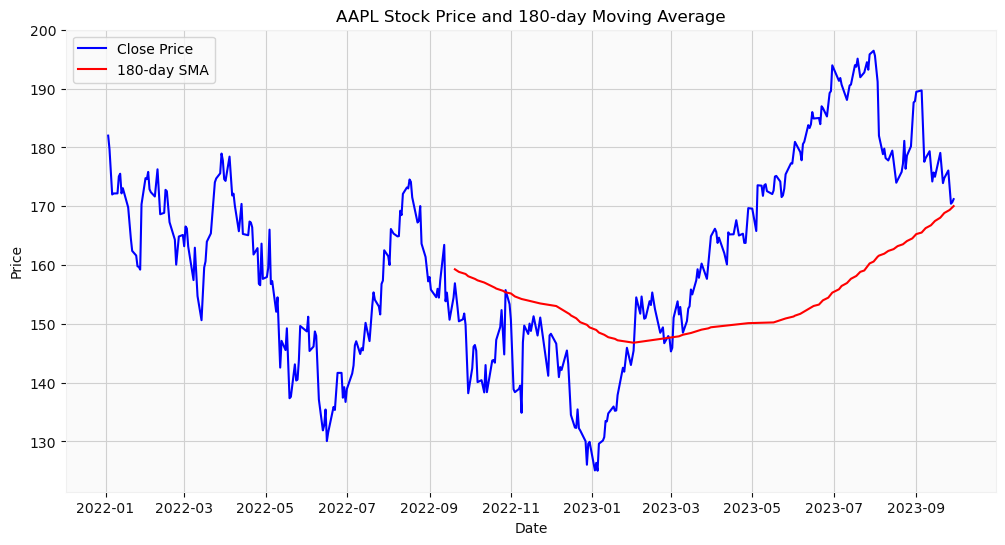

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
ticker_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-10-01"
data = yf.download(ticker_symbol, start=start_date, end=end_date)
data['180-day SMA'] = data['Close'].rolling(window=180).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['180-day SMA'], label='180-day SMA', color='red')
plt.title(f'{ticker_symbol} Stock Price and 180-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

# Q7. Did the chapter's final example use "indirect" importing? If so, how exactly do you do it?

"indirect" importing involves giving libraries or modules a shorter or more convenient alias when importing them. This is achieved by using the import statement followed by the desired alias with the as keyword.

Indirect importing with aliases enhances code readability and manageability, especially when working with multiple libraries or modules, by providing shorter and more user-friendly names for referencing these imported components throughout your code.


In [6]:
import numpy as np
import pandas as pd
arr = np.array([1, 2, 3, 4, 5])

data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

sum_arr = np.sum(arr)
mean_df = df.mean()

print("Sum of NumPy array:", sum_arr)
print("Mean of DataFrame:")
print(mean_df)

Sum of NumPy array: 15
Mean of DataFrame:
A    2.0
B    5.0
dtype: float64


We import the numpy library with the alias np and the pandas library with the alias pd.

We use these aliases (np and pd) to create a NumPy array (arr) and a Pandas DataFrame (df).

We perform operations using the aliases, such as calculating the sum of the NumPy array and the mean of the DataFrame.

Using aliases like np and pd makes your code more concise and easier to read, especially when working with libraries that have longer names. It's a common practice to import and use libraries this way in Python to enhance code readability and reduce typing.

# Done all 7 questions 

# Regards,Yashwant